In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [6]:
df = pd.read_excel("./data/linear-approximation.xlsx", header=6, index_col=0, sheet_name="Sheet1")

In [7]:
df.head()

,Number
Time[s],
0,98433.561371
10,94203.487920
20,91517.336375
30,86539.457397
40,81777.430583


In [10]:
watt_arr = np.array([0,10,20,40,60,80])
df_all = pd.DataFrame()
for i in range(1,6):
    df = pd.read_excel("./data/linear-approximation.xlsx", header=6, index_col=0, sheet_name="Sheet"+str(i))
    df["W"] = watt_arr[i]
    df_all = pd.concat([df_all, df])

In [11]:
df_all

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10
0,99029.902000,20
10,91712.170320,20


In [12]:
groups = df_all.groupby("W")

In [13]:
df_10W = groups.get_group(10)

In [14]:
df_10W

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10


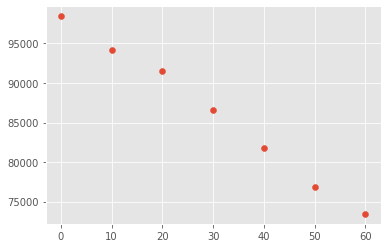

In [16]:
plt.scatter(df_10W.index, df_10W["Number"])

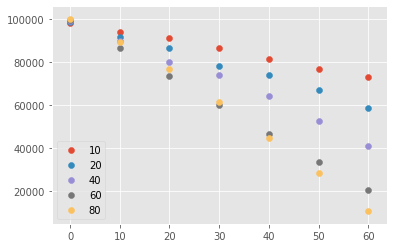

In [17]:
for name, group in groups:
    plt.scatter(group.index, group["Number"], label=name)
plt.legend()

In [18]:
param = sp.polyfit(df_10W.index, df_10W["Number"], 1)

In [19]:
param

array([ -426.39035152, 98902.69506669])

In [20]:
p_list = []
p_list.append(0)
for name, group in groups:
    param = sp.polyfit(group.index, group["Number"], 1)
    print(name, -param[0])
    p_list.append(-param[0])

10 426.3903515160265
20 649.8899826428558
40 947.7399997936383
60 1327.8571428571424
80 1508.104196494783


In [21]:
p_list

[0,
 426.3903515160265,
 649.8899826428558,
 947.7399997936383,
 1327.8571428571424,
 1508.104196494783]

Text(0, 0.5, 'Efficiency')

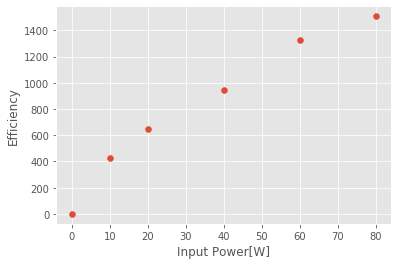

In [22]:
plt.scatter(watt_arr, p_list)
plt.xlabel("Input Power[W]")
plt.ylabel("Efficiency")

In [27]:
a = sp.polyfit(watt_arr[:3], p_list[:3], 1)

In [28]:
a

array([32.49449913, 33.81512006])

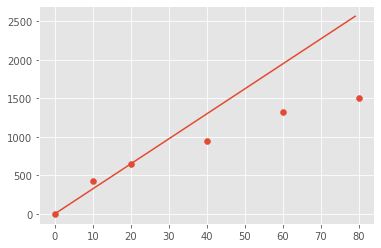

In [30]:
plt.scatter(watt_arr, p_list)
x = np.arange(0, 80, 1)
plt.plot(x, a[0]*x)